In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.)Delivery Time 

In [63]:
delivery_time_df=pd.read_csv('C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Simple_Linear_regression\\delivery_time.csv')
delivery_time_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# 
EDA 

In [18]:
delivery_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [19]:
delivery_time_df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [20]:
# There are no null values in the given data

{'whiskers': [<matplotlib.lines.Line2D at 0x24f6671bbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x24f66725280>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f6671b850>,
 'medians': [<matplotlib.lines.Line2D at 0x24f667259a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24f66725cd0>,
 'means': []}

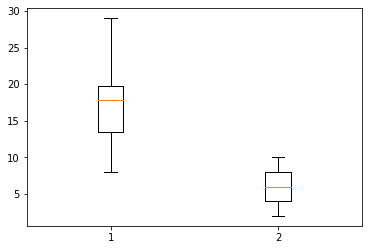

In [21]:
plt.boxplot(delivery_time_df)

In [22]:
# there are no outliers in the given data

In [23]:
delivery_time_df.duplicated().sum()

0

In [24]:
# there are no duplicated values

In [25]:
#changing the colunm names for easy addressing
delivery_time_df=delivery_time_df.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},axis=1)

In [26]:
delivery_time_df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:xlabel='SortingTime', ylabel='Count'>

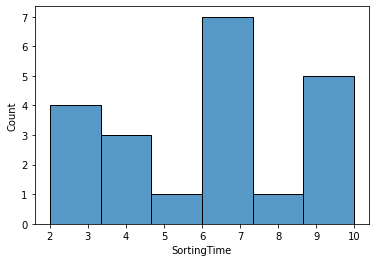

In [27]:
sns.histplot(delivery_time_df.SortingTime)

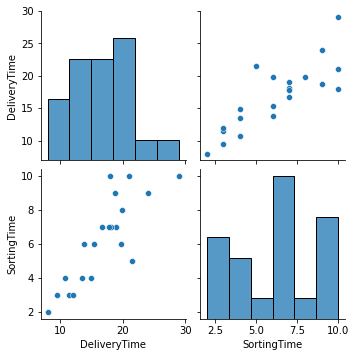

In [28]:
sns.pairplot(delivery_time_df)

# 
BUILDING MODEL

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

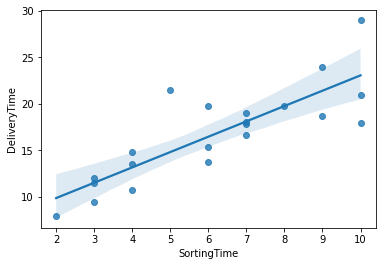

In [76]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=delivery_time_df)

In [29]:
import statsmodels.formula.api as smf

model_basic=smf.ols('DeliveryTime~SortingTime',data=delivery_time_df).fit()
predict_basic=model_basic.predict(delivery_time_df)
model_basic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        16:48:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
error=delivery_time_df.DeliveryTime-predict_basic
error.sum()

-4.440892098500626e-14

In [35]:
delivery_time_df["logSortingTime"]=np.log(delivery_time_df.SortingTime)

In [34]:
model_trans1=smf.ols('DeliveryTime~logSortingTime',data=delivery_time_df).fit()
predict_trans1=model_trans1.predict(delivery_time_df)
model_trans1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        16:49:21   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1597      2.455      0.472      0.642      -3.978       6.297
logSortingTime     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
error_trans1=delivery_time_df.DeliveryTime-predict_trans1
error_trans1.sum()

1.0658141036401503e-13

In [39]:
delivery_time_df["sqrSortingTime"]=1-np.sqrt(delivery_time_df.SortingTime)

In [40]:
model_trans2=smf.ols('DeliveryTime~sqrSortingTime',data=delivery_time_df).fit()
predict_trans2=model_trans2.predict(delivery_time_df)
model_trans2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           2.61e-06
Time:                        16:55:00   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.4178      1.835      2.952      0.008       1.576       9.259
sqrSortingTime    -7.9366      1.204     -6.592      0.000     -10.456      -5.417
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         6.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
error_trans2=delivery_time_df.DeliveryTime-predict_trans2
error_trans2.sum()

6.750155989720952e-14

In [43]:
delivery_time_df["sqr2SortingTime"]=1/(1-np.sqrt(delivery_time_df.SortingTime))

In [44]:
model_trans3=smf.ols('DeliveryTime~sqr2SortingTime',data=delivery_time_df).fit()
predict_trans3=model_trans3.predict(delivery_time_df)
model_trans3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     26.33
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           5.94e-05
Time:                        16:56:56   Log-Likelihood:                -54.267
No. Observations:                  21   AIC:                             112.5
Df Residuals:                      19   BIC:                             114.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          23.7522      1.543     15.390      0.000      20.522      26.982
sqr2SortingTime     8.2331      1.605      5.131      0.000       4.875      11.592
==============================================================================
Omnibus:                        7.059   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                4.639
Skew:                           1.043   Prob(JB):                       0.0983
Kurtosis:                       3.974   Cond. No.                         3.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
df_rsqr={'Models':['Basic model','Log transform','Square Transform','1-Square Transform'],
         'R Squared':[model_basic.rsquared,model_trans1.rsquared,model_trans2.rsquared,model_trans3.rsquared],
         'AIC' :[model_basic.aic,model_trans1.aic,model_trans2.aic,model_trans3.aic]
        }
rsqr_df=pd.DataFrame(df_rsqr)
rsqr_df

,Models,R Squared,AIC
0,Basic model,0.682271,106.714002
1,Log transform,0.695443,105.824850
2,Square Transform,0.695806,105.799821
3,1-Square Transform,0.580821,112.533111


In [ ]:
###################### Since log transformation has larger r squared value and least AIC values ... 
################Best model would be model_trans1

# 2.) Salary hike

In [70]:
salary_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Simple_Linear_regression\\Salary_Data.csv")
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [71]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [72]:
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [73]:
salary_df.duplicated().sum()

0

In [74]:
# There are no duplicated values

<AxesSubplot:xlabel='Salary', ylabel='Count'>

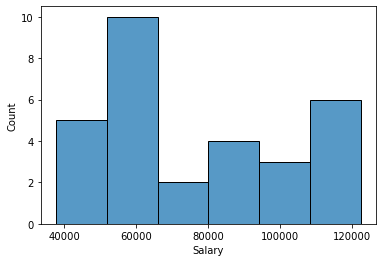

In [75]:
sns.histplot(salary_df.Salary)

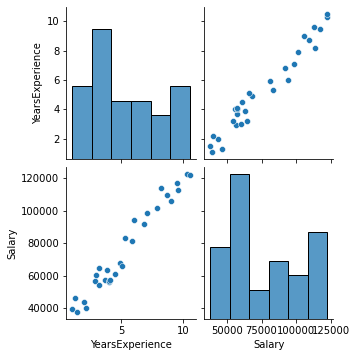

In [76]:
sns.pairplot(salary_df)

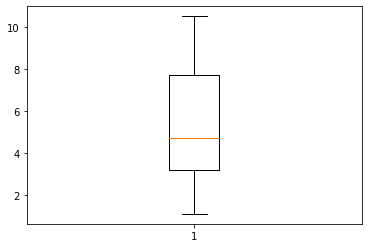

In [77]:
plt.boxplot(salary_df.YearsExperience)
plt.show()

In [78]:
# There are no outliers in the data

In [79]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
## Since the correlation of salary and years of experience is greater, they are linearly dependent 

# 
BUILDING THE MODEL

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

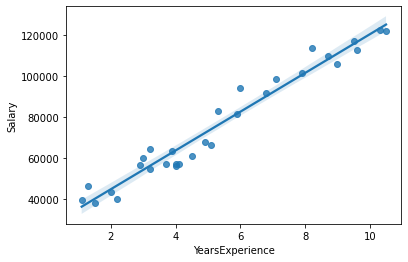

In [55]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_df)

In [53]:
model_salaries=smf.ols('Salary~YearsExperience',data=salary_df).fit()
predict_salary=model_salaries.predict(salary_df)
model_salaries.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        17:33:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
error_salary=salary_df.Salary-predict_salary
error_salary.sum()

1.8189894035458565e-10

In [56]:
salary_df["logYearsExperience"]=np.log(salary_df.YearsExperience)

In [57]:
model_salaries_trans1=smf.ols('Salary~logYearsExperience',data=salary_df).fit()
predict_salary_trans1=model_salaries_trans1.predict(salary_df)
model_salaries_trans1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           3.25e-13
Time:                        17:35:44   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
logYearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
salary_df["SqrYearsExperience"]=np.sqrt(salary_df.YearsExperience)

In [60]:
model_salaries_trans2=smf.ols('Salary~SqrYearsExperience',data=salary_df).fit()
predict_salary_trans2=model_salaries_trans2.predict(salary_df)
model_salaries_trans2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           8.57e-18
Time:                        17:37:11   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
SqrYearsExperience   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
######### Since the regression graph has values in the linear format, 
#########   model without any transformations has the highest r squared value

In [61]:
df_rsqr_salaries={'Models':['Basic model','Log transform','Square Transform'],
         'R Squared':[model_salaries.rsquared,model_salaries_trans1.rsquared,model_salaries_trans2.rsquared],
         'AIC' :[model_salaries.aic,model_salaries_trans1.aic,model_salaries_trans2.aic]
        }
Salaries_rsqr_df=pd.DataFrame(df_rsqr_salaries)
Salaries_rsqr_df

,Models,R Squared,AIC
0,Basic model,0.956957,606.882317
1,Log transform,0.853889,643.547117
2,Square Transform,0.931001,621.038875


In [ ]:
## Basic model without any transformations has the highest r squared value and less AIC value .